# Linear Regression Model

## **Importing Necessary Libraries**

In [1]:
# For analysis and numerical functions
import numpy as np
import pandas as pd

# For Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action='ignore')

## **Dataset Loading**

In [2]:
# Read the csv file using pandas
df = pd.read_csv('day.csv')

In [3]:
# Reading the Dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### cnt is a target variable anmd rest columns are features

## **Data Sanity Checks**

In [4]:
# Checking the total number of Rows and Columns.
df.shape

(730, 16)

#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

In [5]:
# Checking the informations of datasets.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## **Checking Statistical Describtion**

In [6]:
# Checking the Statistical informations of the dataset.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Cleaning Data

## **Drop those columns who are of no use for analysis**

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also 
for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable 
`cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [7]:
# Creating a list to drop no use columns at onces
dropping_cols = ['instant','dteday','atemp','casual','registered']
df.drop(dropping_cols, axis=1, inplace=True)

#### Dropping casual column and registered column because it is given in problem statement that 'cnt' column is the combined of both the columns

In [8]:
# Checking Data after dropping columns
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


In [9]:
# Checking proportion of missing values in each column
df.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [10]:
# Calulating number of unique values in each column
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

In [11]:
# Creating list for categorical, continuous and target column.
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols = ['temp','hum','windspeed']
target = ['cnt']
len(cat_cols)+len(cont_cols)+len(target)

11

## **Uniariate Analysis**

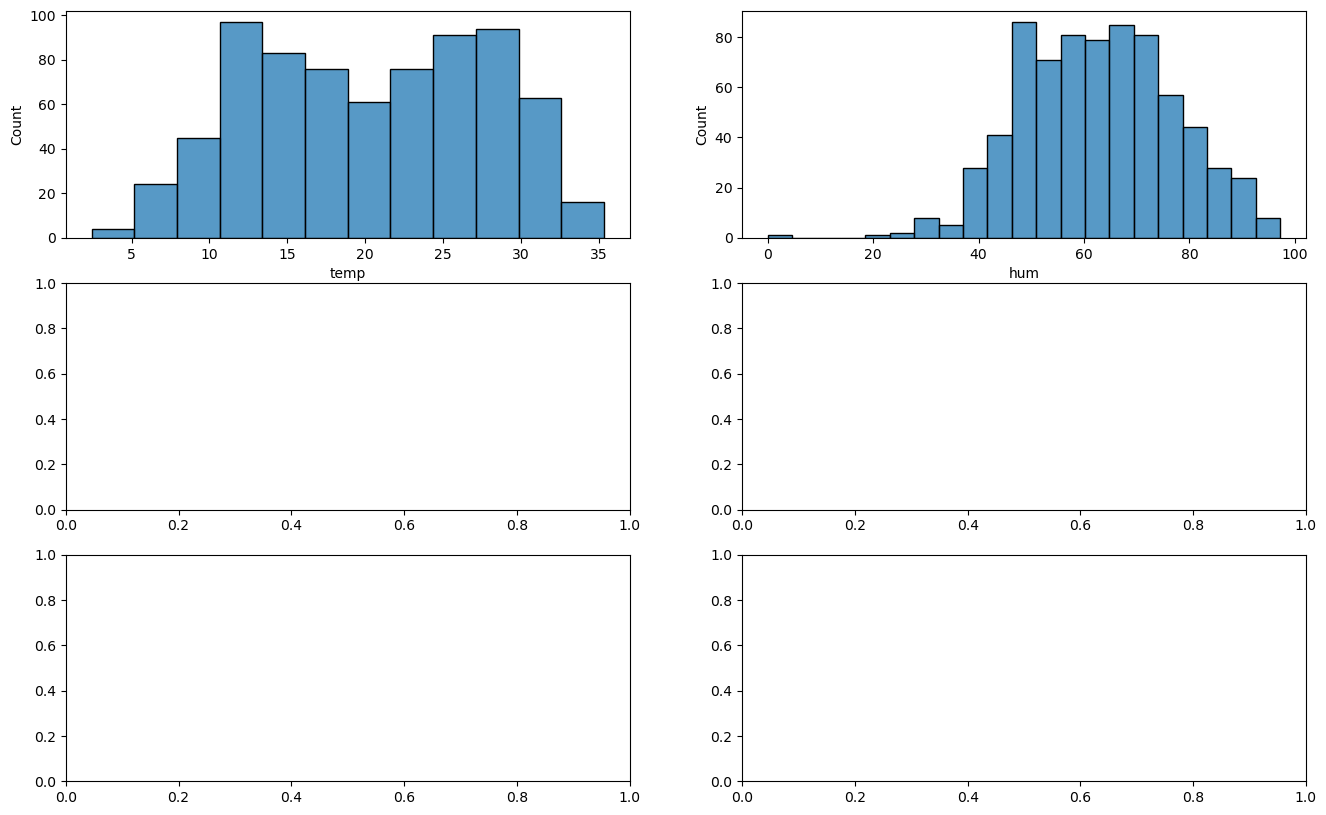

In [12]:
# Print continuous columns graph using countplot
fig, axs = plt.subplots(len(cont_cols) // 1, 2, figsize=(16, 10))
for i in range(len(cont_cols) // 2):
    for j in range(2):
        index = 2 * i + j
        sns.histplot(df[cont_cols[index]], ax=axs[i][j])
plt.show()


### _Insights_:
- According to 'windspeed' people would prefer to travel while windspeed is between 8 to 16 after, that the rented bike graph goes down
- On the basis 'hum' column customer rented bike when humidity is higher than 70
- According to 'temp' graph people prefer to rented bike when temprature is moderate either extreme low nor extreme high
- Based on above insights we can conclude that climate directly control shared bike business.

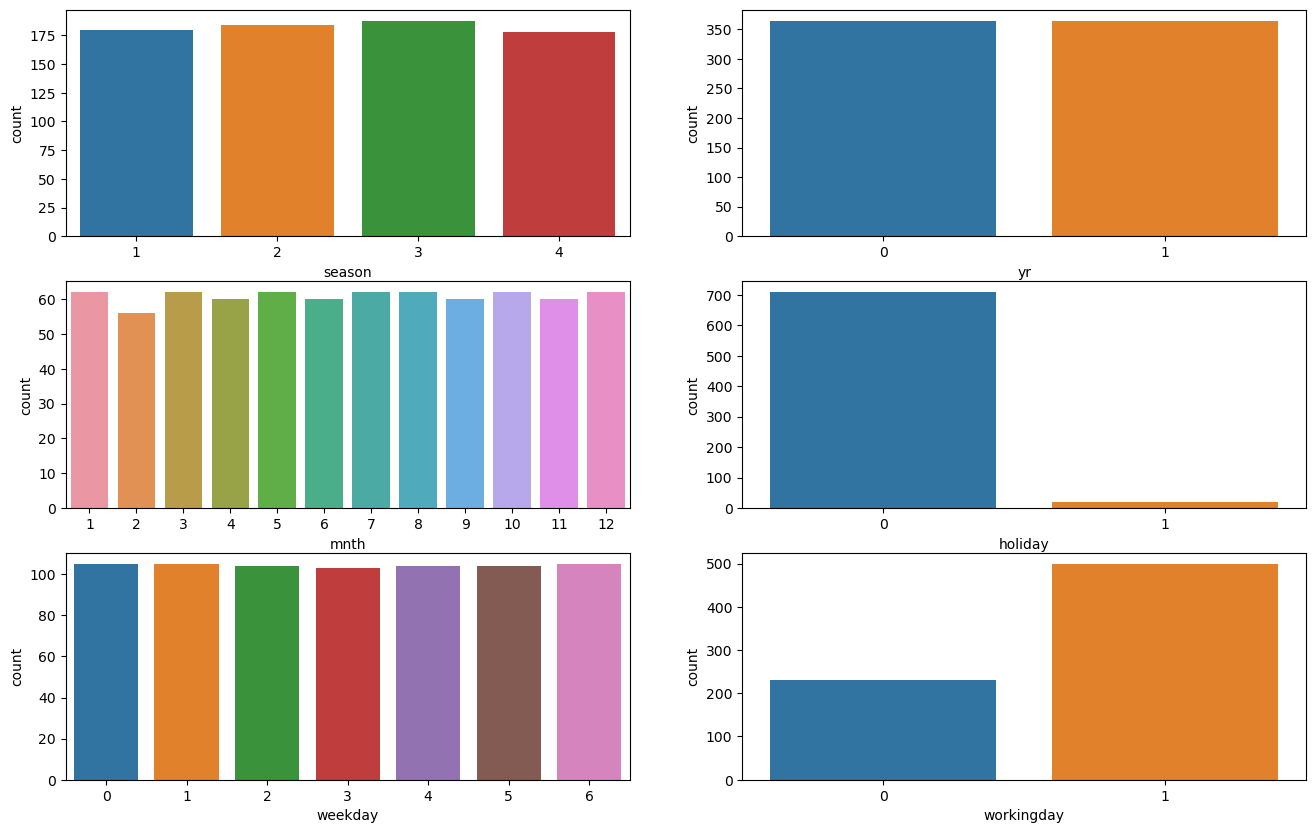

In [13]:
# Print countplot graph for categorical columns
fig, axs = plt.subplots(len(cat_cols) // 2, 2, figsize=(16, 10))
for i in range(len(cat_cols) // 2):
    for j in range(2):
        index = 2 * i + j
        sns.countplot(x=cat_cols[index], data=df, ax=axs[i][j])
plt.show()


## **Biavariate Analysis**

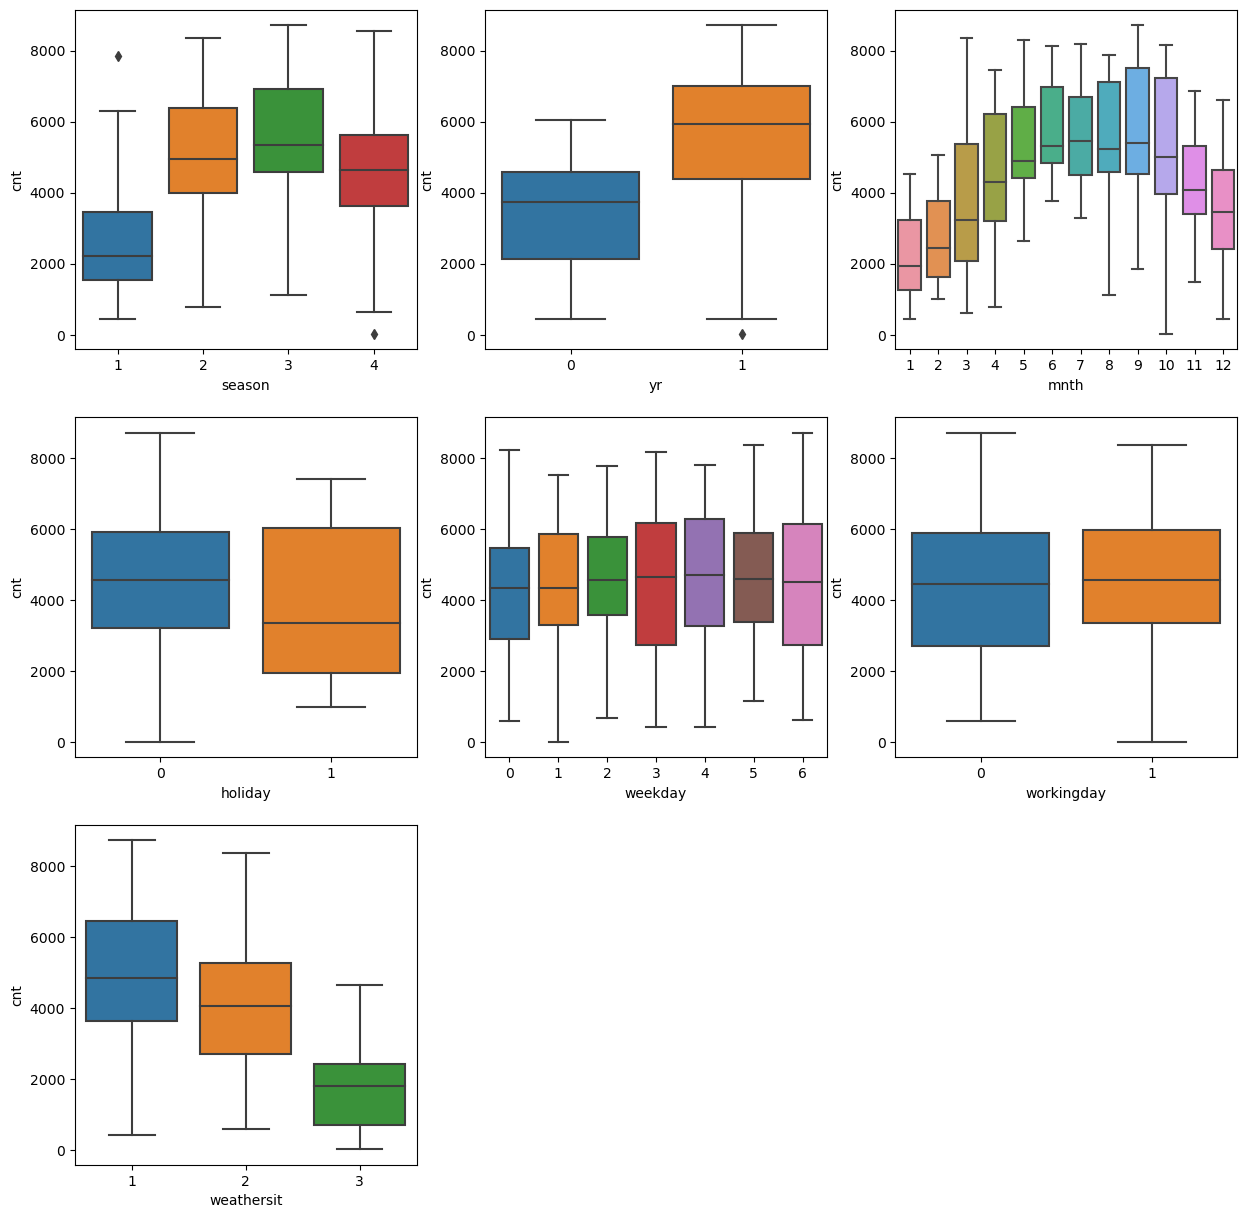

In [14]:
# Boxplot for categorical column
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:
    Here are few insights we drawn from the plots

    1. Fall is the most popular season to hire bikes.
    2. I've noticed an increase in demand for next year.
    3. Demand is increasing month after month until season_6. The month of season_9 has the biggest demand. Demand begins to 
    fall after season_9.
    4. When there is a holiday, demand falls.
    5. The weekday does not provide a clear picture of demand.

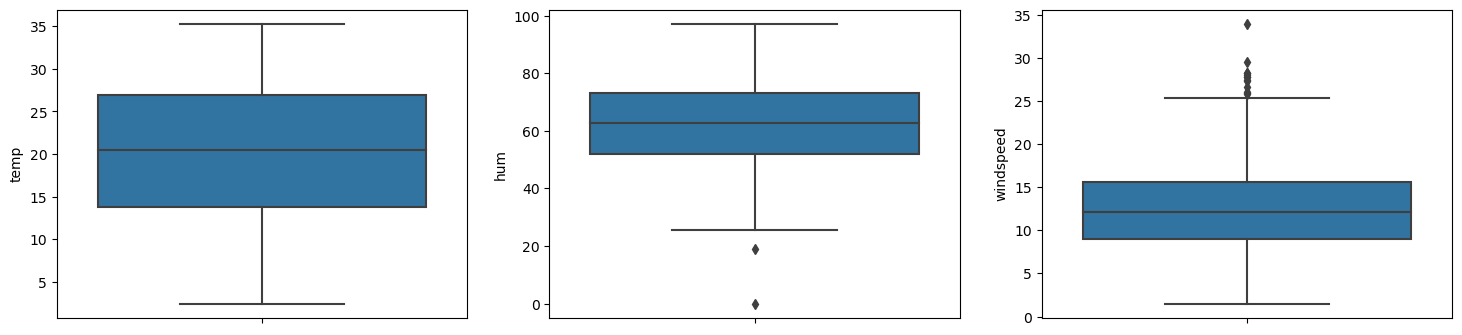

In [15]:
# Draw box plots for indepent variables with continuous values
cols = ['temp','hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=df)
    i+=1

#### From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## Multivariate Analysis

In [16]:
# create new dataframe with only continuous columns
cont_df = df[cont_cols]

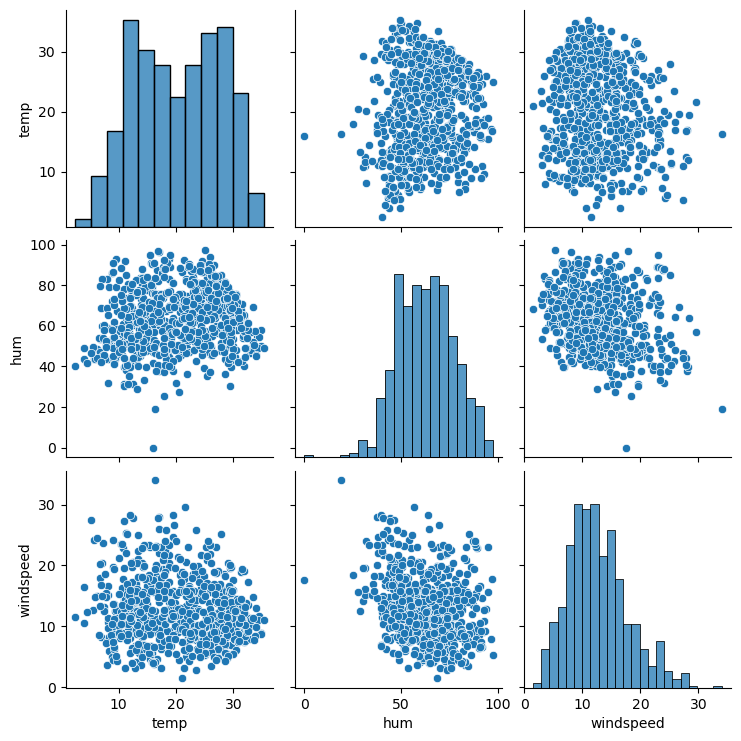

In [17]:
# plot pairplot
sns.pairplot(cont_df)
plt.show()

## **Pre - Processing Steps**

# mapping

In [18]:
# mapping column season--
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [19]:
# mapping column month--
df['mnth'].replace({1:"January",2:"Feburary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
                    9:"September",10:"October",11:"November",12:"December"},inplace=True)

In [20]:
# mapping column weekday--
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [21]:
# mapping column weathersit
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

### **Dummy Variable Creation**



In [22]:
# Checking no. of unique values of categorical columns
df[cat_cols].nunique()# Only for non binary categorical columns

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [23]:
# Creating dummy variable for 'season' column and drop first column
season_dum = pd.get_dummies(df["season"], drop_first=True)
season_dum.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
# Creating dummy variable for 'mnth' column and drop first column
mnth_dum=pd.get_dummies(df["mnth"], drop_first=True)
mnth_dum.head()

,August,December,Feburary,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [25]:
# Creating dummy variable for 'weekday' column and drop first column
weekday_dum=pd.get_dummies(df["weekday"], drop_first=True)
weekday_dum.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [26]:
# Creating dummy variable for 'weathersit' column and drop first column
weathersit_dum=pd.get_dummies(df["weathersit"], drop_first=True)
weathersit_dum.head()

,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [27]:
# Combining the result to the dataframe
df1 = pd.concat([season_dum, mnth_dum, weekday_dum, weathersit_dum, df], axis=1)
df1.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Monday,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Tuesday,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Wednesday,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600


In [28]:
# Print columns after creating dummy variuables 
df1.columns

Index(['spring', 'summer', 'winter', 'August', 'December', 'Feburary',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light rain_Light snow_Thunderstorm', 'Mist_cloudy',
       'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [29]:
# Check if the columns exist in the dataframe before dropping them
cols_to_drop = ['season', 'mnth', 'weathersit', 'weekday']

In [30]:
# Creating loop to drop columns
existing_cols = [col for col in cols_to_drop if col in df.columns]
df1.drop(existing_cols, axis=1, inplace=True)

In [31]:
# Again reading data
df1.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   spring                              730 non-null    uint8  
 1   summer                              730 non-null    uint8  
 2   winter                              730 non-null    uint8  
 3   August                              730 non-null    uint8  
 4   December                            730 non-null    uint8  
 5   Feburary                            730 non-null    uint8  
 6   January                             730 non-null    uint8  
 7   July                                730 non-null    uint8  
 8   June                                730 non-null    uint8  
 9   March                               730 non-null    uint8  
 10  May                                 730 non-null    uint8  
 11  November                            730 non-n

In [33]:
# Checking columns again after dropping not necessary columns
df1.columns

Index(['spring', 'summer', 'winter', 'August', 'December', 'Feburary',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light rain_Light snow_Thunderstorm', 'Mist_cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## **Train-Test Split**

In [34]:
# Spliting columns into two portion 
X=df1.drop(["cnt"],axis=1)   # X = features 
y=df1["cnt"]   # y = target column

In [35]:
# Spliting data into 4 parts as X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [36]:
# Measiring X_train shape
X_train.shape

(511, 28)

In [37]:
# Measiring X_test shape
X_test.shape

(219, 28)

## **Scalling**

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_train.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.395666,0.504508,0.188475


In [41]:
X_test[cont_cols] = scaler.transform(X_test[cont_cols])
X_test.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0.831783,0.657364,0.084219
535,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0.901354,0.610133,0.153728
299,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.511964,0.837699,0.334206
221,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.817246,0.314298,0.537414


In [42]:
#Standardization
X_train=(X_train-X_train.mean())/X_train.std()

In [43]:
X_test=(X_test-X_test.mean())/X_test.std()

## **Modelling**

### **Feature Selection**

In [44]:
# Building a Lienar Regression model using SKLearn for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)#15

selector=selector.fit(X_train,y_train)
selector.support_
selector

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [45]:
# Columns selected by RFE
selected_features = list(X_train.columns[selector.support_])
selected_features

['spring',
 'winter',
 'January',
 'July',
 'November',
 'Saturday',
 'Sunday',
 'Light rain_Light snow_Thunderstorm',
 'Mist_cloudy',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed']

In [46]:
sf = len(selected_features)
sf

15

In [47]:
# Assigning changes of selected_feature into X_train and X_test
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [48]:
# Saving above changes into X_train-sm and X_test_sm
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [49]:
# First Model
model1 = sm.OLS(y_train,X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          9.31e-188
Time:                        19:06:20   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4491.3033     34.928    128.587      0.000    4422.678    4559.929
spring                              -387.8562     57.922     -6.696      0.000    -501.659    -274.054
winter                               235.4559     51.177      4.601      0.000     134.905     336.007
January                              -97.5700     43.864     -2.224      0.027    -183.752     -11.388
July                                -196.8124     39.484     -4.985      0.000    -274.390    -119.235
November                             -87.5947     43.198     -2.028      0.043    -172.468      -2.721
Saturday                           -2.987e+14   9.23e+15     -0.032      0.974   -1.84e+16    1.78e+16
Sunday                             -2.892e+14   8.93e+15     -0.032      0.974   -1.78e+16    1.73e+16
Light rain_Light snow_Thunderstorm  -368.4545     39.459     -9.338      0.000    -445.981    -290.928
Mist_cloudy                         -238.4708     43.780     -5.447      0.000    -324.488    -152.454
yr                                  1007.6293     35.583     28.318      0.000     937.717    1077.542
holiday                            -1.301e+14   4.02e+15     -0.032      0.974   -8.02e+15    7.76e+15
workingday                         -3.864e+14   1.19e+16     -0.032      0.974   -2.38e+16    2.31e+16
temp                                 922.3629     62.192     14.831      0.000     800.170    1044.556
hum                                 -177.9847     48.343     -3.682      0.000    -272.968     -83.002
windspeed                           -266.4667     38.109     -6.992      0.000    -341.343    -191.591
==============================================================================
Omnibus:                       63.291   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.127
Skew:                          -0.617   Prob(JB):                     3.10e-37
Kurtosis:                       5.525   Cond. No.                     7.90e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()

vif_data["Feature"]=X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,spring,2.723615
1,winter,2.125085
2,January,1.551844
3,July,1.266280
4,November,1.460210
5,Saturday,inf
6,Sunday,inf
7,Light rain_Light snow_Thunderstorm,1.247474
8,Mist_cloudy,1.567514
9,yr,1.035140


In [51]:
# Dropping season_3 because it is very closer to p_value 0.05 or (5%).

X_train = X_train_sm.drop(["Sunday"],axis=1)
X_test = X_test_sm.drop(["Sunday"],axis=1)

In [52]:
# again adding the changes in update in x_data

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [53]:
# Second Model
model2 = sm.OLS(y_train,X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.53e-188
Time:                        19:06:20   Log-Likelihood:                -4126.2
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     496   BIC:                             8346.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4491.3033     34.903    128.679      0.000    4422.727    4559.880
spring                              -387.7743     57.825     -6.706      0.000    -501.387    -274.162
winter                               235.3058     50.931      4.620      0.000     135.240     335.372
January                              -97.7380     43.525     -2.246      0.025    -183.254     -12.222
July                                -196.9141     39.331     -5.007      0.000    -274.190    -119.638
November                             -87.3030     42.218     -2.068      0.039    -170.251      -4.355
Saturday                             169.8559     46.631      3.643      0.000      78.237     261.475
Light rain_Light snow_Thunderstorm  -368.6372     39.025     -9.446      0.000    -445.312    -291.962
Mist_cloudy                         -238.4932     43.743     -5.452      0.000    -324.438    -152.549
yr                                  1007.6118     35.553     28.341      0.000     937.758    1077.466
holiday                              -62.7980     37.820     -1.660      0.097    -137.104      11.508
workingday                           181.4021     47.904      3.787      0.000      87.283     275.521
temp                                 922.3659     62.148     14.842      0.000     800.261    1044.471
hum                                 -177.8340     48.084     -3.698      0.000    -272.308     -83.360
windspeed                           -266.4576     38.081     -6.997      0.000    -341.278    -191.638
==============================================================================
Omnibus:                       65.643   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.814
Skew:                          -0.650   Prob(JB):                     2.20e-37
Kurtosis:                       5.498   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Checking VIF again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,2.739387
2,winter,2.125085
3,January,1.552004
4,July,1.267331
5,November,1.460210
6,Saturday,1.781446
7,Light rain_Light snow_Thunderstorm,1.247692
8,Mist_cloudy,1.567604
9,yr,1.035579


In [55]:
# Dropping mnth because it has high p_value of 0.121
X_train = X_train_sm.drop(["holiday"],axis=1)
X_test = X_test_sm.drop(["holiday"],axis=1)

In [56]:
# again adding the changes in update in x_data
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [57]:
# Third Model
model3 = sm.OLS(y_train,X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.77e-188
Time:                        19:06:20   Log-Likelihood:                -4127.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4491.3033     34.965    128.452      0.000    4422.606    4560.000
spring                              -392.1873     57.866     -6.778      0.000    -505.880    -278.495
winter                               235.2876     51.020      4.612      0.000     135.045     335.530
January                              -99.3127     43.591     -2.278      0.023    -184.959     -13.667
July                                -193.9447     39.360     -4.927      0.000    -271.277    -116.613
November                             -95.0889     42.031     -2.262      0.024    -177.669     -12.509
Saturday                             191.1554     44.911      4.256      0.000     102.916     279.395
Light rain_Light snow_Thunderstorm  -368.1694     39.093     -9.418      0.000    -444.977    -291.362
Mist_cloudy                         -237.7931     43.818     -5.427      0.000    -323.885    -151.701
yr                                  1008.4802     35.612     28.318      0.000     938.511    1078.450
workingday                           208.8778     45.035      4.638      0.000     120.396     297.359
temp                                 919.2278     62.228     14.772      0.000     796.964    1041.491
hum                                 -176.7501     48.165     -3.670      0.000    -271.382     -82.118
windspeed                           -266.6079     38.148     -6.989      0.000    -341.560    -191.656
==============================================================================
Omnibus:                       69.871   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.448
Skew:                          -0.679   Prob(JB):                     3.26e-41
Kurtosis:                       5.629   Cond. No.                         3.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Again checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,2.733601
2,winter,2.125085
3,January,1.551268
4,July,1.264711
5,November,1.442197
6,Saturday,1.646642
7,Light rain_Light snow_Thunderstorm,1.247627
8,Mist_cloudy,1.567458
9,yr,1.035355


In [59]:
X_train = X_train_sm.drop(["Saturday"],axis=1)
X_test = X_test_sm.drop(["Saturday"],axis=1)

In [60]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [61]:
model4 = sm.OLS(y_train,X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.43e-186
Time:                        19:06:20   Log-Likelihood:                -4136.8
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4491.3033     35.561    126.300      0.000    4421.436    4561.171
spring                              -396.7680     58.842     -6.743      0.000    -512.377    -281.159
winter                               236.6691     51.889      4.561      0.000     134.721     338.617
January                              -96.7520     44.330     -2.183      0.030    -183.849      -9.655
July                                -195.8255     40.028     -4.892      0.000    -274.470    -117.181
November                            -104.0571     42.693     -2.437      0.015    -187.938     -20.176
Light rain_Light snow_Thunderstorm  -355.7247     39.648     -8.972      0.000    -433.622    -277.827
Mist_cloudy                         -222.0040     44.405     -5.000      0.000    -309.248    -134.760
yr                                  1004.8766     36.209     27.752      0.000     933.735    1076.018
workingday                            89.6303     35.859      2.499      0.013      19.176     160.085
temp                                 921.8341     63.286     14.566      0.000     797.494    1046.174
hum                                 -192.8555     48.834     -3.949      0.000    -288.802     -96.909
windspeed                           -265.8839     38.798     -6.853      0.000    -342.112    -189.656
==============================================================================
Omnibus:                       60.746   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.975
Skew:                          -0.559   Prob(JB):                     2.26e-39
Kurtosis:                       5.666   Cond. No.                         3.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Again checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,2.732655
2,winter,2.124999
3,January,1.550972
4,July,1.264552
5,November,1.438573
6,Light rain_Light snow_Thunderstorm,1.240648
7,Mist_cloudy,1.556224
8,yr,1.034769
9,workingday,1.014884


In [63]:
X_train = X_train_sm.drop(["workingday"],axis=1)
X_test = X_test_sm.drop(["workingday"],axis=1)

In [64]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [65]:
model5 = sm.OLS(y_train,X_train_sm)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.21e-185
Time:                        19:06:21   Log-Likelihood:                -4140.0
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     499   BIC:                             8355.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4491.3033     35.747    125.641      0.000    4421.070    4561.537
spring                              -399.8312     59.138     -6.761      0.000    -516.021    -283.642
winter                               230.4485     52.101      4.423      0.000     128.084     332.813
January                              -96.8756     44.562     -2.174      0.030    -184.428      -9.323
July                                -199.5358     40.210     -4.962      0.000    -278.538    -120.534
November                            -104.4789     42.917     -2.434      0.015    -188.799     -20.159
Light rain_Light snow_Thunderstorm  -351.4513     39.819     -8.826      0.000    -429.684    -273.219
Mist_cloudy                         -216.6461     44.586     -4.859      0.000    -304.245    -129.047
yr                                  1007.3444     36.385     27.685      0.000     935.857    1078.832
temp                                 925.9346     63.596     14.560      0.000     800.985    1050.884
hum                                 -194.9137     49.083     -3.971      0.000    -291.349     -98.478
windspeed                           -270.0411     38.965     -6.930      0.000    -346.598    -193.484
==============================================================================
Omnibus:                       67.870   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.904
Skew:                          -0.671   Prob(JB):                     1.05e-38
Kurtosis:                       5.533   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Again checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,2.731470
2,winter,2.120111
3,January,1.550970
4,July,1.262812
5,November,1.438550
6,Light rain_Light snow_Thunderstorm,1.238341
7,Mist_cloudy,1.552597
8,yr,1.034000
9,temp,3.158873


#### `_Inference`_
Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.847 
Let us select Model 3 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [67]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [68]:
#Let us build the finalmodel using sklearn
cols = ['spring', 'winter', 'January',
        'July', 'November', 'Light rain_Light snow_Thunderstorm', 
        'Mist_cloudy', 'yr', 
        'temp', 'hum',
        'windspeed']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

4491.3033268101735 [-399.8311945   230.44849412  -96.87559188 -199.53582454 -104.47890842
 -351.45134656 -216.64613523 1007.34436031  925.93460106 -194.91366279
 -270.0410619 ]


In [69]:
y_train_pred = lr.predict(X_train[cols])

In [70]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

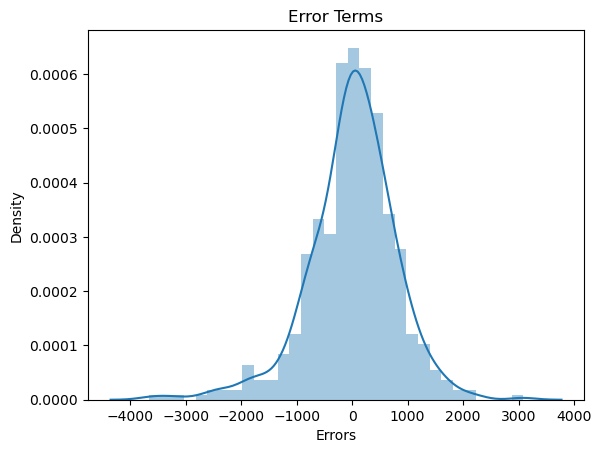

In [71]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

## MODEL IS READY TO USE

In [72]:
# Importing Libraries to calculate r square, train as well as test performance
from sklearn.metrics import r2_score

In [73]:
# R-Square of Test Data
predicted_value = res5.predict(X_test_sm)
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 81.13 %


In [74]:
# R-Square of Train Data
predicted_value1 = res5.predict(X_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 83.26 %


In [75]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round((1 - (1 - r2_score(y_test, predicted_value)) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)) * 100, 2)
print(f"Adjusted R-Squared: {adjusted_r2} %")


Adjusted R-Squared: 80.04 %


# **CONCLUSION**

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during 'spring' and 'winter'.
- Company should focus on expanding business during July,November,January.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during season_3 when the weather is pleasant and also advertise a little for mnth_8 to mnth_10 as this is when business would be at its best.